# Introduction

This is a revamp of my original Titanic notebook which I created many years ago. 

https://github.com/JAlblas/ML_Specialisation_DeepLearningAI/blob/main/Course1/C1_W3_Logistic_Regression.ipynb

https://github.com/JAlblas/ML_Specialisation_DeepLearningAI/blob/main/Course2/C2_W3_Assignment.ipynb

# Importing packages

Let's start by importing all necessary packages:

In [1]:
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2


# Loading data

We will now load the data. The training data is stored into the df variable, while the test set is saved to df_test. The test test will be used to make predictions for the competition.

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
#df = df.set_index('PassengerId')

# Exploratory Data Analysis (EDA)

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.shape

(891, 12)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Most features have complete data, except for Age and Cabin.

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

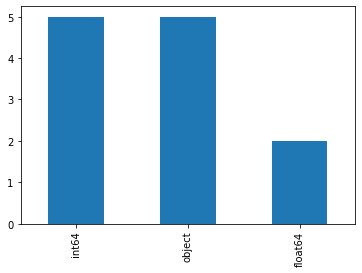

In [11]:
df.dtypes.value_counts().plot.bar()

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Visualisations

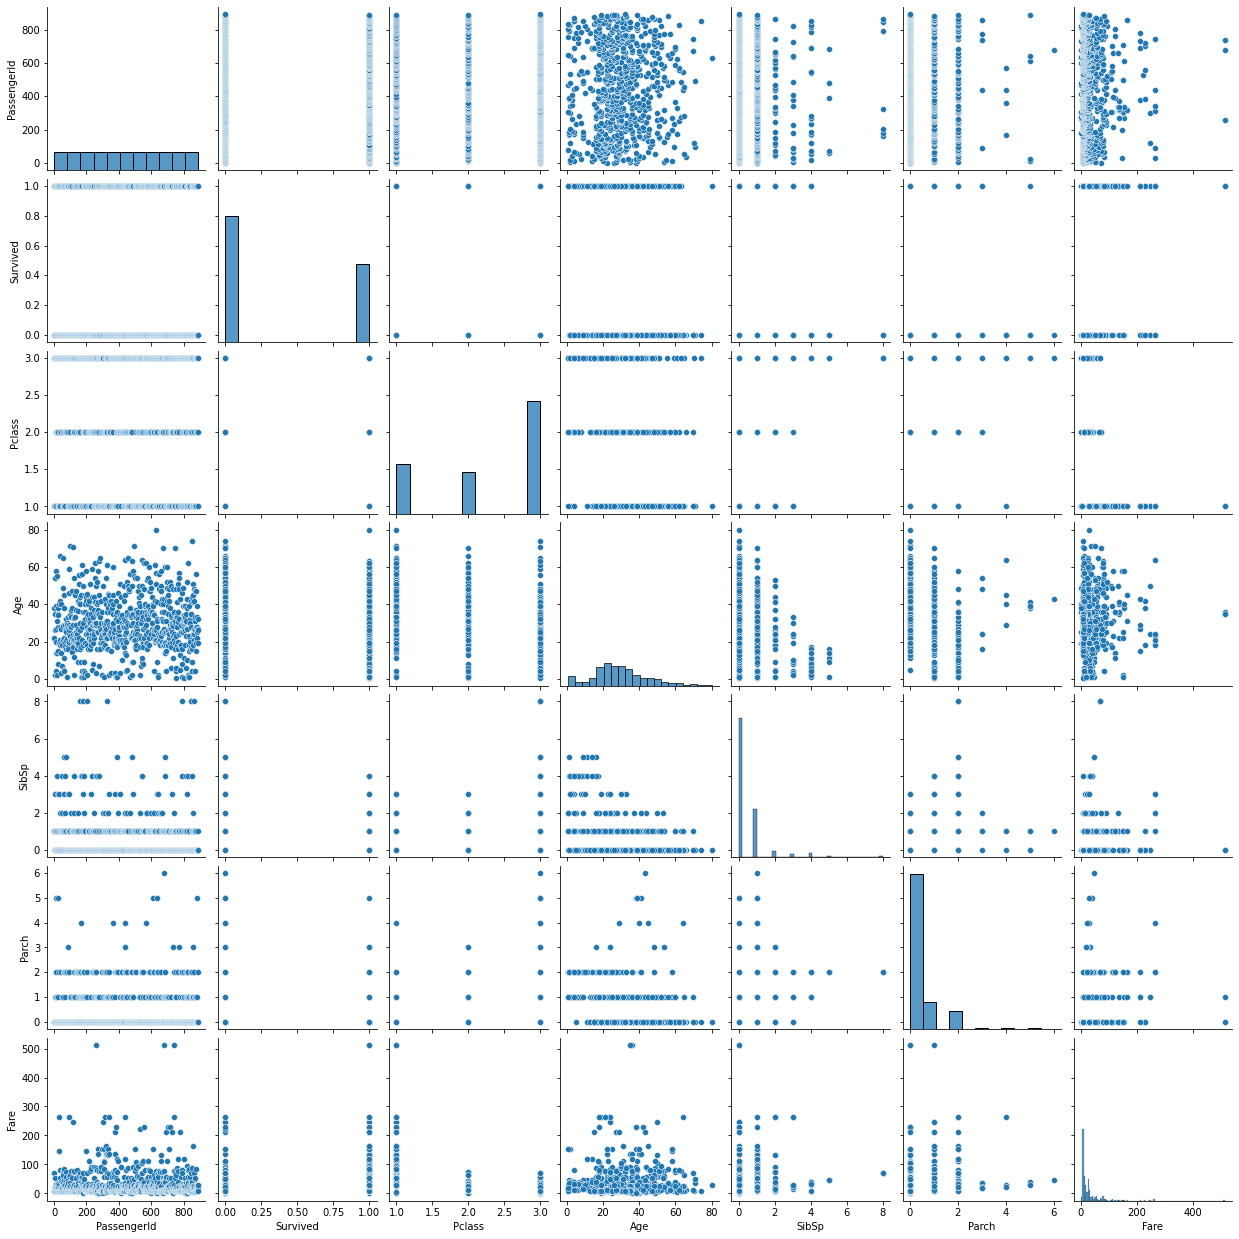

In [13]:
sns.pairplot(df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

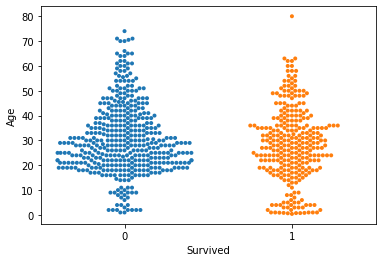

In [14]:
sns.swarmplot(x='Survived', y='Age', data=df, size=4)

In [15]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


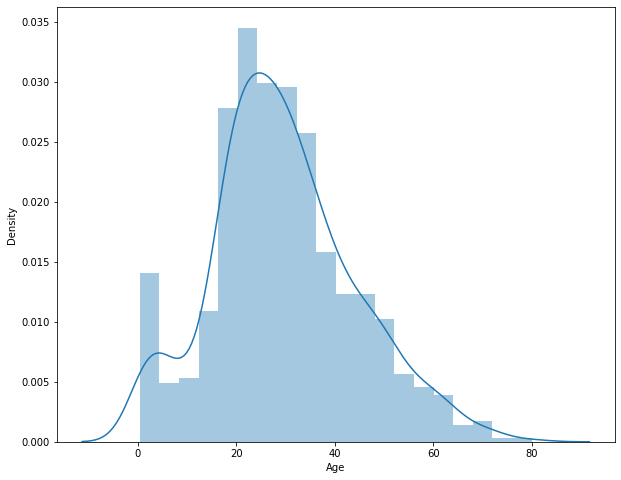

In [19]:
plt.figure(figsize = (10,8))
sns.distplot(df['Age'],hist = True, label = 'Age')
plt.show()

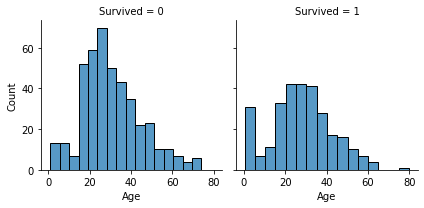

In [20]:
# Explore Age vs Survived
g = sns.FacetGrid(df, col='Survived')
g = g.map(sns.histplot, "Age")

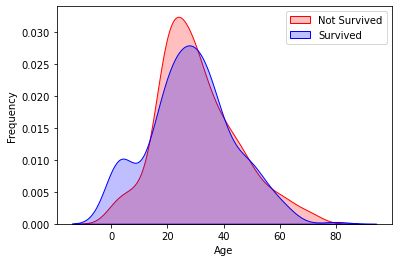

In [21]:
# Explore Age distibution 
g = sns.kdeplot(df["Age"][(df["Survived"] == 0) & (df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Age"][(df["Survived"] == 1) & (df["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

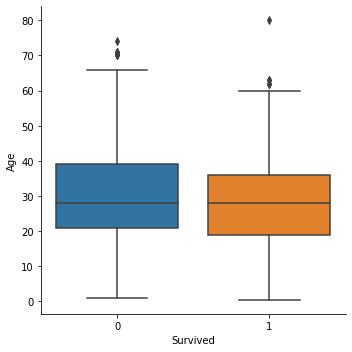

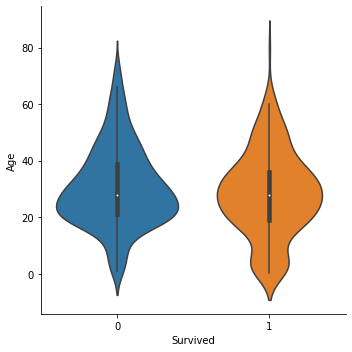

In [22]:
g = sns.catplot(x="Survived", y = "Age",data = df, kind="box")
g = sns.catplot(x="Survived", y = "Age",data = df, kind="violin")

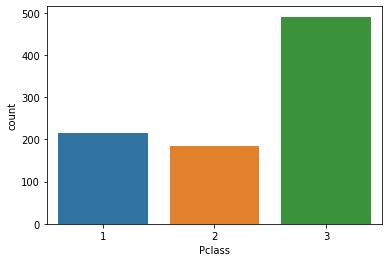

In [23]:
plt.figure()
sns.countplot(x= df['Pclass'])
plt.show()

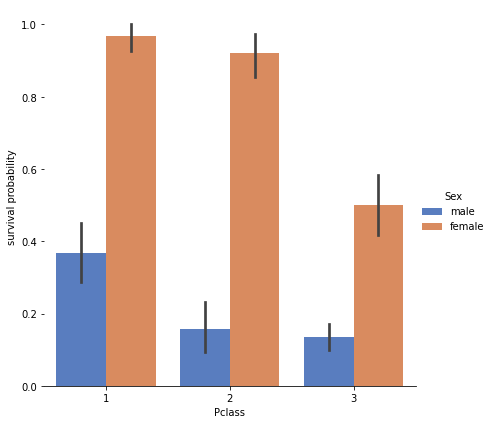

In [24]:
# Explore Pclass vs Survived by Sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

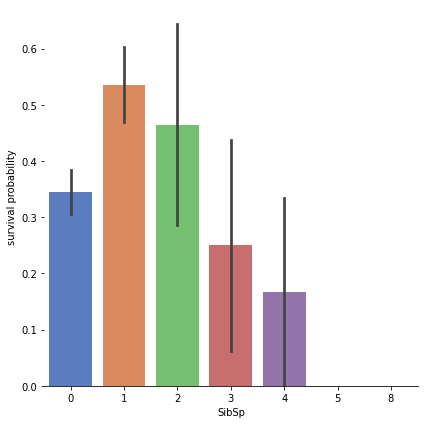

In [25]:
# Explore SibSp feature vs Survived
g = sns.catplot(x="SibSp",y="Survived",data=df,kind="bar", height= 6, 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

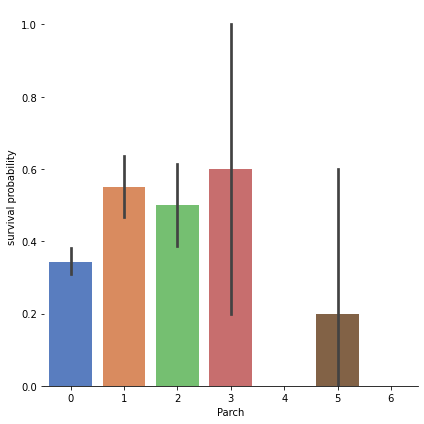

In [26]:
# Explore Parch feature vs Survived
g  = sns.catplot(x="Parch",y="Survived",data=df,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

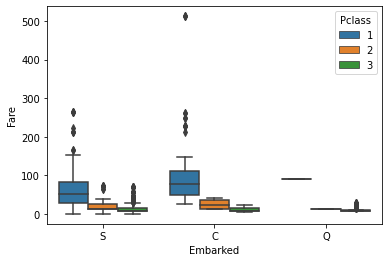

In [27]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df);

<AxesSubplot:>

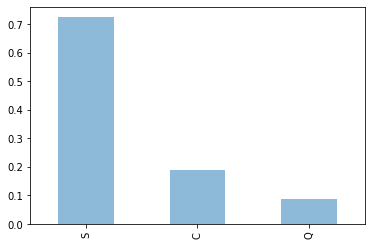

In [28]:
df.Embarked.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


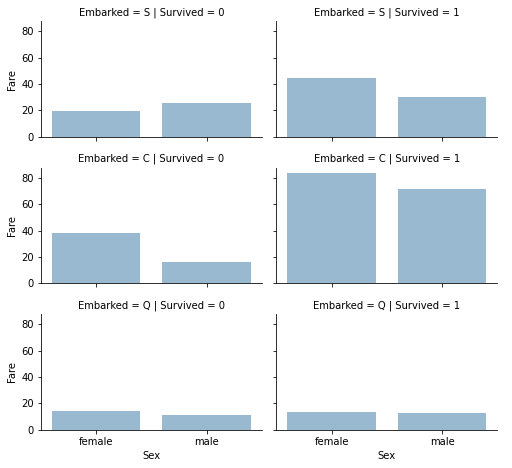

In [29]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

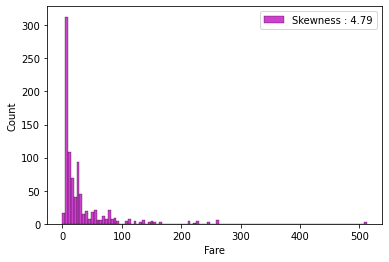

In [30]:
g = sns.histplot(df["Fare"], color="m", label="Skewness : %.2f"%(df["Fare"].skew()))
g = g.legend(loc="best")

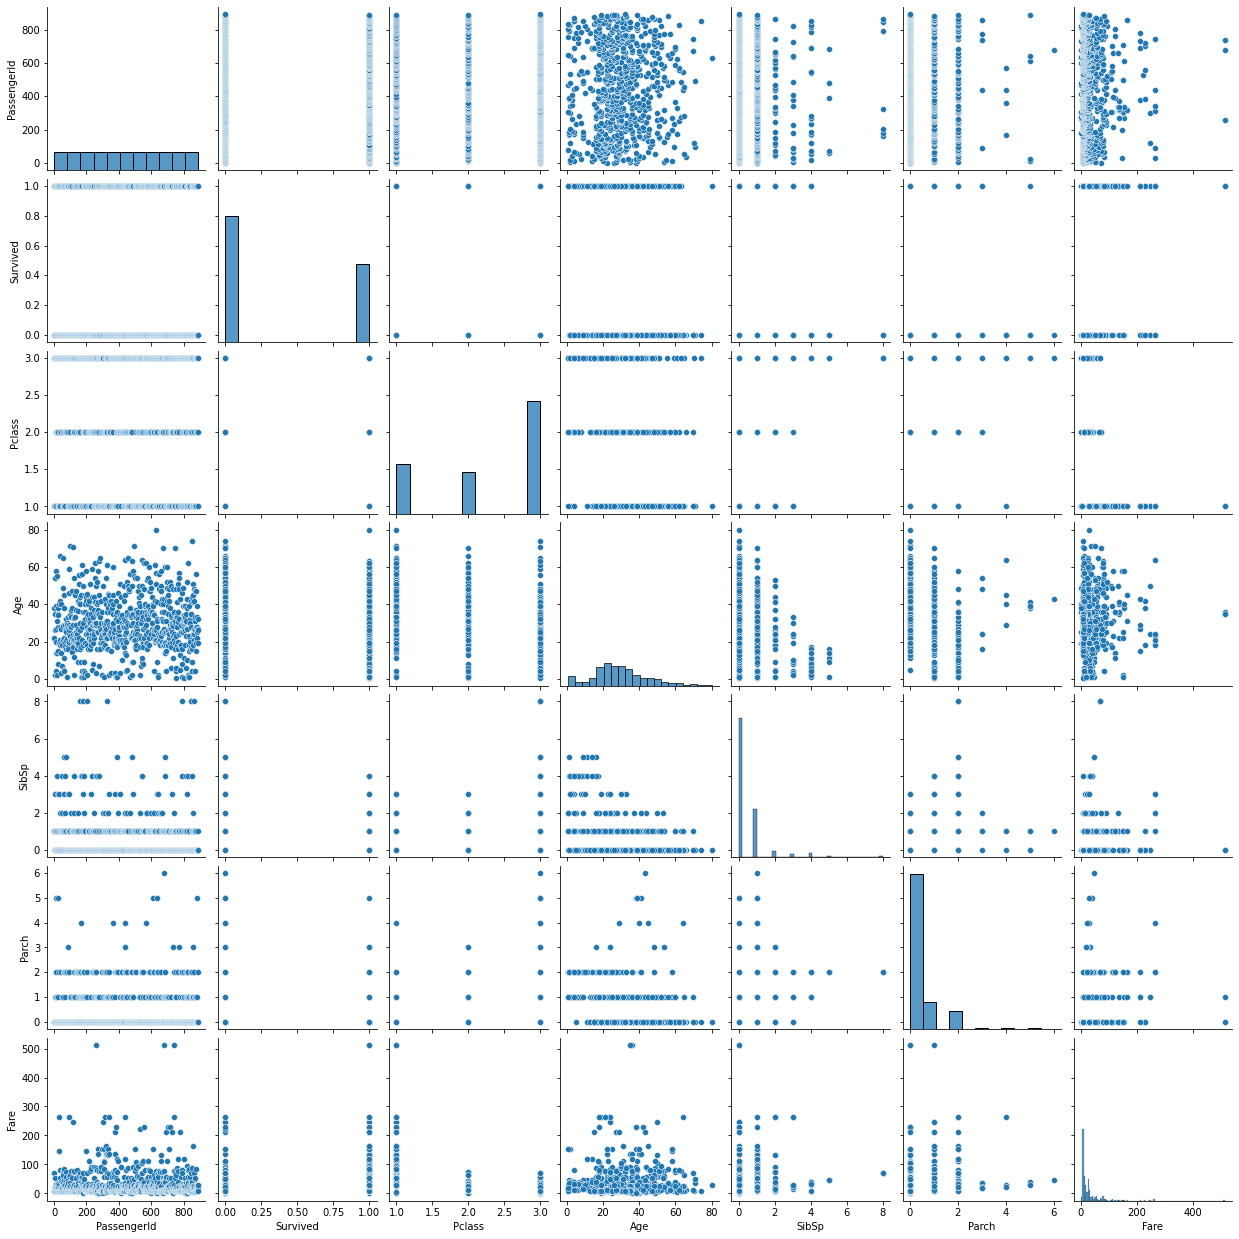

In [31]:
sns.pairplot(df)

<AxesSubplot:>

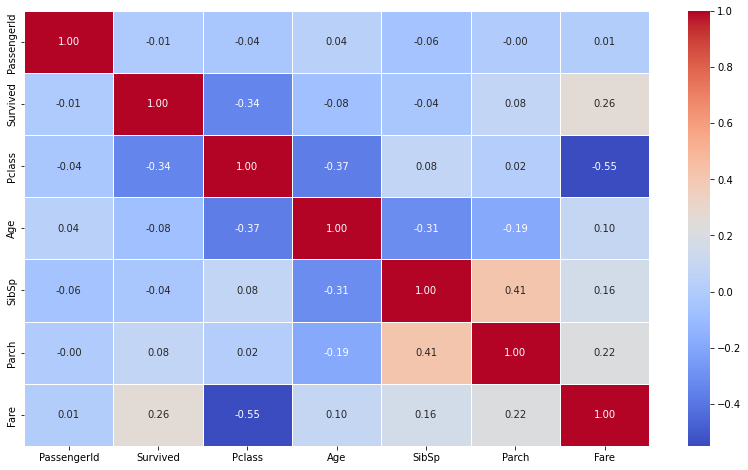

In [32]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), linewidths = 0.5, annot = True, fmt = ".2f", cmap = "coolwarm")

In [33]:
df.corr()["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [34]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [35]:
df.Cabin.str[0].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

# Feature Engineering

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df, df.Survived, test_size=0.175, random_state=90)

In [37]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S


In [38]:
def processData(df):
    
    df['Sex'] = df['Sex'].apply(lambda r: 0 if r == 'male' else 1).astype('int')
    
    df["FamilySize"] = df['SibSp'] + df['Parch']
    
    # Create new feature of family size
    df['Single'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    df['SmallF'] = df['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
    df['MedF'] = df['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    df['LargeF'] = df['FamilySize'].map(lambda s: 1 if s >= 5 else 0)
    
    df['HasBoardedSiblingsOrSpouses'] = df['SibSp'] >= 1
    df['HasBoardedParentsChildren'] = df['Parch'] >= 1

    df['isChild'] = df['Age'] < 18
    df['isSenior'] = df['Age'] > 65
    
    df['Deck'] = df['Cabin'].str[0]
    df['Deck'] = df['Deck'].fillna("Unknown")
    #df['Deck'] = df['Deck'].replace(['A', 'B', 'C'], 'ABC')
    #df['Deck'] = df['Deck'].replace(['D', 'E'], 'DE')
    #df['Deck'] = df['Deck'].replace(['F', 'G'], 'FG')
    
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme', 'Mrs'], 'Miss')
    
    df = df.set_index('PassengerId', drop=False)
    
    df = df.drop(['Ticket', 'Cabin', 'Name'], axis=1)

    return df

In [39]:
X_train = processData(X_train)
X_val = processData(X_val)
df_test = processData(df_test)

<AxesSubplot:>

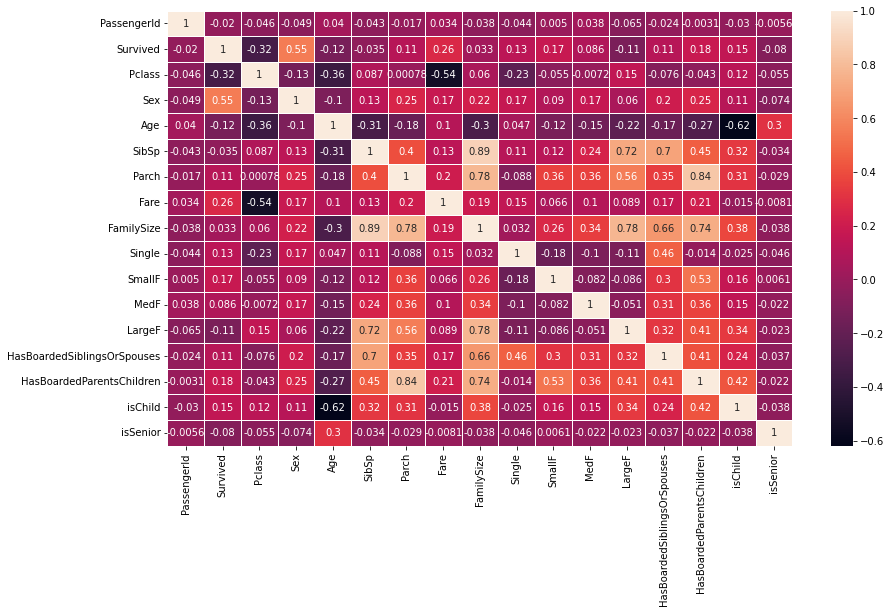

In [40]:
plt.figure(figsize = (14,8))
sns.heatmap(X_train.corr(), linewidths = 0.5, annot = True)

In [41]:
X_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Single,SmallF,MedF,LargeF,HasBoardedSiblingsOrSpouses,HasBoardedParentsChildren,isChild,isSenior
PassengerId,1.000000,-0.020165,-0.046165,-0.049091,0.040191,-0.043211,-0.017443,0.033647,-0.038326,-0.044270,0.005032,0.038004,-0.065192,-0.023728,-0.003057,-0.029868,-0.005632
Survived,-0.020165,1.000000,-0.318726,0.551529,-0.122217,-0.034520,0.112922,0.261307,0.033497,0.131169,0.171715,0.085943,-0.110624,0.111124,0.179365,0.147373,-0.079611
Pclass,-0.046165,-0.318726,1.000000,-0.134980,-0.363702,0.086651,0.000784,-0.536256,0.059573,-0.225331,-0.054719,-0.007186,0.151457,-0.075722,-0.043244,0.122967,-0.055036
Sex,-0.049091,0.551529,-0.134980,1.000000,-0.100815,0.131821,0.252763,0.172686,0.217773,0.168166,0.090071,0.171121,0.059688,0.200045,0.250383,0.111384,-0.073848
Age,0.040191,-0.122217,-0.363702,-0.100815,1.000000,-0.309897,-0.181864,0.103149,-0.300864,0.047203,-0.117380,-0.146935,-0.220434,-0.171876,-0.272065,-0.618668,0.299198
SibSp,-0.043211,-0.034520,0.086651,0.131821,-0.309897,1.000000,0.402960,0.133164,0.886588,0.111824,0.117021,0.236962,0.721619,0.702489,0.454925,0.323487,-0.034210
Parch,-0.017443,0.112922,0.000784,0.252763,-0.181864,0.402960,1.000000,0.198532,0.780602,-0.088480,0.360590,0.359690,0.563283,0.347030,0.843296,0.308943,-0.028640
Fare,0.033647,0.261307,-0.536256,0.172686,0.103149,0.133164,0.198532,1.000000,0.191282,0.147831,0.066413,0.099782,0.089161,0.165891,0.212429,-0.014596,-0.008063
FamilySize,-0.038326,0.033497,0.059573,0.217773,-0.300864,0.886588,0.780602,0.191282,1.000000,0.031649,0.262163,0.343618,0.777503,0.655142,0.736891,0.377061,-0.037838
Single,-0.044270,0.131169,-0.225331,0.168166,0.047203,0.111824,-0.088480,0.147831,0.031649,1.000000,-0.175578,-0.103516,-0.108218,0.458278,-0.013829,-0.024871,-0.046090


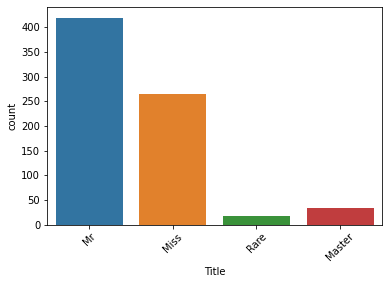

In [42]:
g = sns.countplot(x="Title",data=X_train)
g = plt.setp(g.get_xticklabels(), rotation=45) 

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


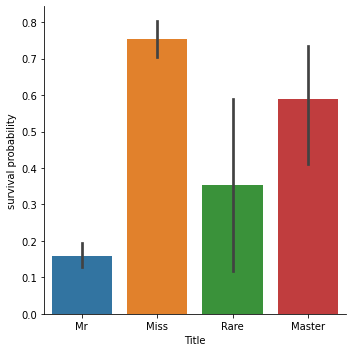

In [43]:
g = sns.factorplot(x="Title",y="Survived",data=X_train,kind="bar")
g = g.set_ylabels("survival probability")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


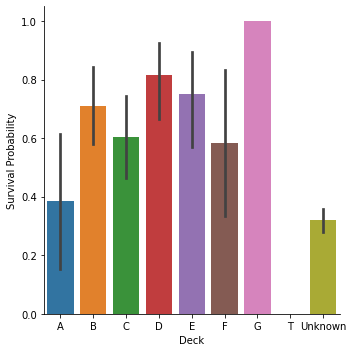

In [44]:
g = sns.factorplot(y="Survived",x="Deck",data=X_train,kind="bar", order=['A','B','C','D','E','F','G','T','Unknown'])
g = g.set_ylabels("Survival Probability")

# Consider scaling

# Consider error train vs validation

# Feature Selection

In [45]:
features = ['Age', 'Pclass', 'Fare', 'Sex', 'Embarked', 'FamilySize', 'HasBoardedParentsChildren', 'HasBoardedSiblingsOrSpouses', 'Single', 'SmallF', 'MedF', 'LargeF', 'isChild', 'isSenior', 'Deck', 'Title']

# Check different models

In [46]:
y_train = X_train.pop('Survived')

In [47]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('skb', SelectKBest(f_classif, k = 10))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('skb', SelectKBest(chi2, k = 10))])

categorical_features = X_train[features].select_dtypes(include=['object']).columns
numeric_features = X_train[features].select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [48]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier(),
    LogisticRegression()
]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])
    pipe.fit(X_train[features], y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_val, y_val))

KNeighborsClassifier(n_neighbors=3)
model score: 0.763
SVC(C=0.025, probability=True)
model score: 0.776
NuSVC(probability=True)
model score: 0.788
DecisionTreeClassifier()
model score: 0.756
RandomForestClassifier()
model score: 0.776
AdaBoostClassifier()
model score: 0.776
GradientBoostingClassifier()
model score: 0.808
[08:24:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model score: 0.782
LogisticRegression()
model score: 0.801


# Grid searching the best model

In [49]:
abc = GradientBoostingClassifier()

In [50]:
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', abc)
                          ])

In [51]:
param_grid = { 
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    'preprocessor__num__skb__k' : [6,7,8,9,10,11,12],
    "preprocessor__cat__imputer__strategy": ["constant"],
    'preprocessor__cat__skb__k' : [6,7,8,9,10,11,12],
    'classifier__n_estimators':[10,50,100,200,500,1000],
    'classifier__learning_rate':[0.01,0.05,0.1]
}

In [52]:
# Apply GridSearchCV on our model with all parameters in params_grid
grid_search = RandomizedSearchCV(final_pipeline, param_grid, scoring='f1')

# Fit all models in the training set
grid_search.fit(X_train[features], y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler()),
                                                                                               ('skb',
                                                                                                SelectKBest())]),
                                                                               Index(['Age', 'Pclass', 'Fare', 'Sex', 'FamilySize',
       'HasBoardedParentsChildren', 'HasBoar

In [53]:
final_model = grid_search.best_estimator_

In [54]:
print("Tuned Hyperparameters :(best parameters) ",grid_search.best_params_)
print("Best score :",grid_search.best_score_)

Tuned Hyperparameters :(best parameters)  {'preprocessor__num__skb__k': 8, 'preprocessor__num__imputer__strategy': 'median', 'preprocessor__cat__skb__k': 7, 'preprocessor__cat__imputer__strategy': 'constant', 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.05}
Best score : 0.7849724000552124


In [55]:
final_model.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_C', 'x0_Q', 'x0_S', 'x0_missing_value', 'x1_A', 'x1_B', 'x1_C',
       'x1_D', 'x1_E', 'x1_F', 'x1_G', 'x1_T', 'x1_Unknown', 'x2_Master',
       'x2_Miss', 'x2_Mr', 'x2_Rare'], dtype=object)

In [56]:
importances = final_model.named_steps['classifier'].feature_importances_


In [57]:
importances

array([0.10224162, 0.31871498, 0.04818323, 0.00319067, 0.00413721,
       0.00462954, 0.01262945, 0.0168236 , 0.00904624, 0.00568278,
       0.0076134 , 0.01297904, 0.01327133, 0.00227077, 0.43858615])

In [58]:
final_model.score(X_val.loc[:, features], y_val)

0.8205128205128205

In [59]:
preds = final_model.predict(X_val[features])

In [60]:
print(accuracy_score(y_val,preds))
print(recall_score(y_val,preds))
print(confusion_matrix(y_val,preds))

0.8205128205128205
0.76
[[90 16]
 [12 38]]


In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model, X_val[features], y_val, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.77 accuracy with a standard deviation of 0.09


In [62]:
# Random Forest
forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Number of trees in random forest
n_estimators = [150,250,350,500]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [4,5,6,7,8]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
param_grid = {
                 "preprocessor__num__imputer__strategy": ["median"],
                 'preprocessor__num__skb__k' : [5,7,9,11,13],
                 "preprocessor__cat__imputer__strategy": ["constant"],
                 'preprocessor__cat__skb__k' : [5,7,9,11,13],
    
                 'classifier__n_estimators': n_estimators,
                 'classifier__max_features': max_features,
                 #'classifier__max_depth': max_depth,
                 #'classifier__min_samples_split': min_samples_split,
                 #'classifier__min_samples_leaf': min_samples_leaf,
                 'classifier__criterion': ['gini', 'entropy']
             }

In [63]:
# Apply GridSearchCV on our model with all parameters in params_grid
#grid_search = RandomizedSearchCV(final_pipeline, param_grid, scoring='neg_mean_squared_error')

# Fit all models in the training set
#grid_search.fit(X_train[features], y_train)


forest_grid_search = RandomizedSearchCV(forest_pipeline, param_grid, cv=10, n_iter=10, scoring='f1', refit=True, verbose=1)

# fine-tune the hyperparameters
forest_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler()),
                                                                                               ('skb',
                                                                                                SelectKBest())]),
                                                                               Index(['Age', 'Pclass', 'Fare', 'Sex', 'FamilySize',
       'HasBoarded

In [64]:
final_model_forest = forest_grid_search.best_estimator_

In [65]:
final_model_forest

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('skb',
                                                                   SelectKBest(k=5))]),
                                                  Index(['Age', 'Pclass', 'Fare', 'Sex', 'FamilySize',
       'HasBoardedParentsChildren', 'HasBoardedSiblingsOrSpouses', 'Single',
       'SmallF', 'MedF', 'LargeF', 'isChild', 'isSenior'],
      d...bject')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
           

In [66]:
print("Tuned Hyperparameters :(best parameters) ",forest_grid_search.best_params_)
print("Best score :",forest_grid_search.best_score_)

Tuned Hyperparameters :(best parameters)  {'preprocessor__num__skb__k': 5, 'preprocessor__num__imputer__strategy': 'median', 'preprocessor__cat__skb__k': 11, 'preprocessor__cat__imputer__strategy': 'constant', 'classifier__n_estimators': 250, 'classifier__max_features': 'sqrt', 'classifier__criterion': 'entropy'}
Best score : 0.7800911043058034


In [67]:
final_model_forest.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_C', 'x0_Q', 'x0_S', 'x0_missing_value', 'x1_A', 'x1_B', 'x1_C',
       'x1_D', 'x1_E', 'x1_F', 'x1_G', 'x1_T', 'x1_Unknown', 'x2_Master',
       'x2_Miss', 'x2_Mr', 'x2_Rare'], dtype=object)

In [68]:
final_model_forest.score(X_val.loc[:, features], y_val)

0.782051282051282

In [69]:
onehot_columns = list(final_model_forest.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(input_features=categorical_features))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
onehot_columns

['Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_missing_value',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_T',
 'Deck_Unknown',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Rare']

In [71]:
preds = final_model_forest.predict(X_val[features])

In [72]:
print(accuracy_score(y_val,preds))
print(recall_score(y_val,preds))
print(confusion_matrix(y_val,preds))

0.782051282051282
0.74
[[85 21]
 [13 37]]


In [73]:
scores = cross_val_score(final_model, X_val[features], y_val, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.77 accuracy with a standard deviation of 0.09


In [74]:
importances = final_model_forest.named_steps['classifier'].feature_importances_

# Predictions

In [75]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Single,SmallF,MedF,LargeF,HasBoardedSiblingsOrSpouses,HasBoardedParentsChildren,isChild,isSenior,Deck,Title
PassengerId,,,,,,,,,,,,,,,,,,,
892,892,3,0,34.5,0,0,7.8292,Q,0,0,0,0,0,False,False,False,False,Unknown,Mr
893,893,3,1,47.0,1,0,7.0000,S,1,1,0,0,0,True,False,False,False,Unknown,Miss
894,894,2,0,62.0,0,0,9.6875,Q,0,0,0,0,0,False,False,False,False,Unknown,Mr
895,895,3,0,27.0,0,0,8.6625,S,0,0,0,0,0,False,False,False,False,Unknown,Mr
896,896,3,1,22.0,1,1,12.2875,S,2,0,1,0,0,True,True,False,False,Unknown,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1305,3,0,NaN,0,0,8.0500,S,0,0,0,0,0,False,False,False,False,Unknown,Mr
1306,1306,1,1,39.0,0,0,108.9000,C,0,0,0,0,0,False,False,False,False,C,Rare
1307,1307,3,0,38.5,0,0,7.2500,S,0,0,0,0,0,False,False,False,False,Unknown,Mr


In [76]:
y_pred = final_model_forest.predict(df_test[features])
len(df_test)
len(y_pred)

418

In [77]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# Create CSV

In [78]:
my_submission = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [79]:
my_submission

,PassengerId,Survived
PassengerId,,
892,892,0
893,893,1
894,894,0
895,895,0
896,896,1
...,...,...
1305,1305,0
1306,1306,1
1307,1307,0
